In [14]:
from os import path

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [33]:
DATA_PATH = path.join(
    # https://www.kaggle.com/datasets/emonsharkar/python-learning-and-exam-performance-dataset
    kagglehub.dataset_download(
        "emonsharkar/python-learning-and-exam-performance-dataset"
    ),
    "python_learning_exam_performance.csv",
)
df = pd.read_csv(DATA_PATH)

In [34]:
display(df.describe().T)
df.info()

,count,mean,std,min,25%,50%,75%,max
student_id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
age,3000.0,35.327000,11.302182,16.0,26.00,36.0,45.00,54.0
weeks_in_course,3000.0,8.121000,4.275019,1.0,5.00,8.0,12.00,15.0
hours_spent_learning_per_week,3000.0,7.035267,2.936134,0.0,5.00,7.0,9.00,17.1
practice_problems_solved,3000.0,59.983667,7.713056,35.0,55.00,60.0,65.00,87.0
projects_completed,3000.0,2.001333,1.395701,0.0,1.00,2.0,3.00,9.0
tutorial_videos_watched,3000.0,39.896667,6.263258,19.0,35.00,40.0,44.00,63.0
uses_kaggle,3000.0,0.400667,0.490115,0.0,0.00,0.0,1.00,1.0
participates_in_discussion_forums,3000.0,0.498333,0.500081,0.0,0.00,0.0,1.00,1.0
debugging_sessions_per_week,3000.0,4.973333,2.236729,0.0,3.00,5.0,6.00,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

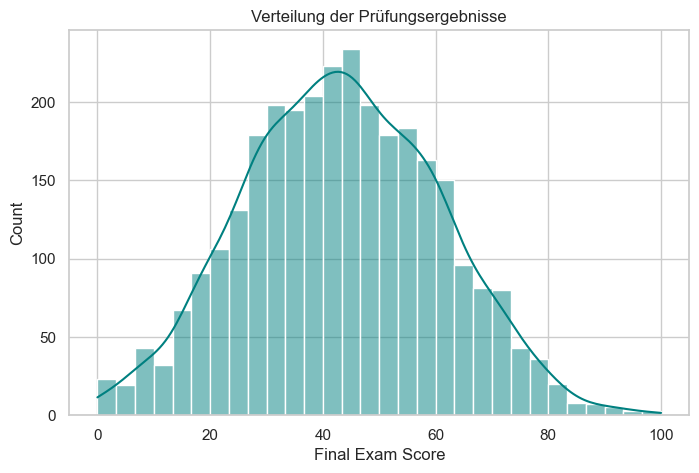

In [ ]:
# Prüfungsergebnisse
plt.figure(figsize=(8, 5))
sns.histplot(df['final_exam_score'], kde=True, bins=30, color='teal')
plt.title("Verteilung der Prüfungsergebnisse")
plt.xlabel("Final Exam Score")
plt.show()

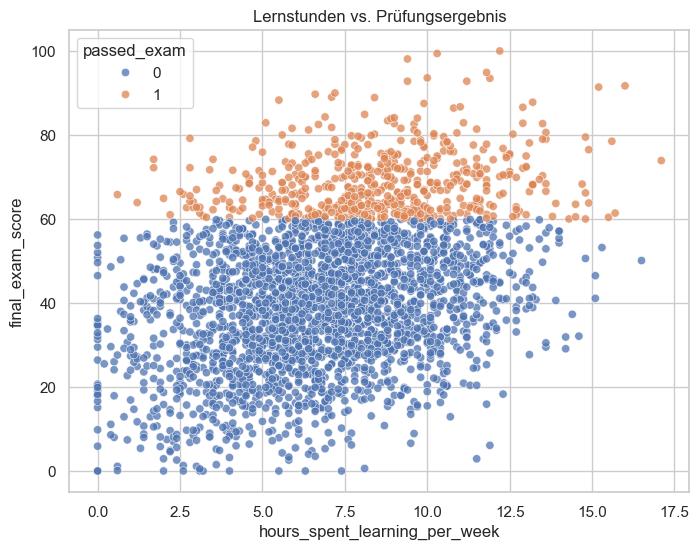

In [28]:
# Lernzeit
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='hours_spent_learning_per_week',
    y='final_exam_score',
    hue='passed_exam',
    alpha=.75
)
plt.title("Lernstunden vs. Prüfungsergebnis")
plt.show()

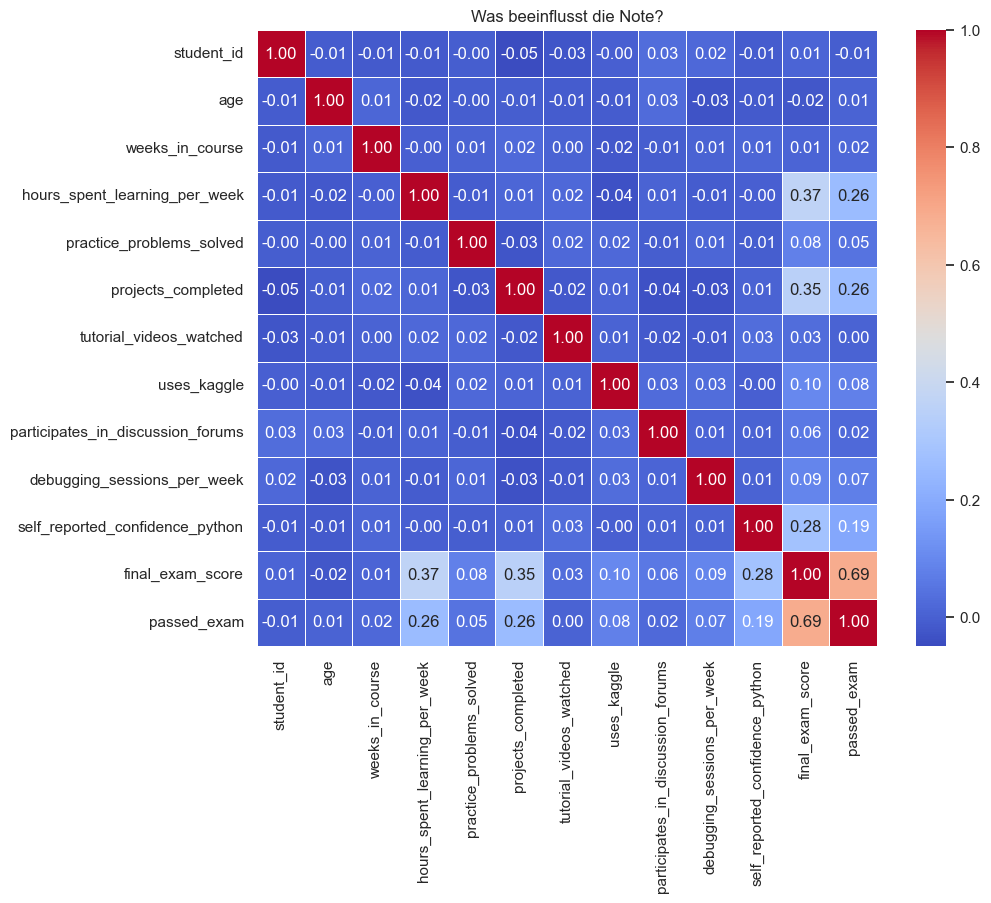

In [37]:
# Korrelationsmatrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Was beeinflusst die Note?")
plt.show()

In [ ]:
# Feature Importance auslesen
importances = regressor.feature_importances_
feature_names = X.columns

# DataFrame erstellen und sortieren
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Top 10 Features anzeigen
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.show()